<H1><center>Project 3<BR><BR>
Linear Regression and Logistic Regression</center></H1>

<H2>Task 1: Machine Learning: Bias and Invasive
</H2>

<P>Watch the movie <a href="https://sites.google.com/wellesley.edu/video-reserves-cs-305/home">Coded Bias</a> highlighting the bias of machine learning algorithms and how they can be applied invasively. Note: you may need to be logged in to your Wellesley account to access the movie.</P>

<P>Please address (minimum 200 words) the following questions in the space below. Which of the many stories presented in the movie did you find most concerning and why? Which of the many technologies discussed in the movie piques your interest to want to learn more about? Which of the various proposals to "solve" the mentioned problems seems most realistic to you and why (if none, what are you pessimistic about)?</P>

Your answer here.









<H2>Task 2: Linear Regression
</H2>

<P>In this task, you will use linear regression to predict people's medical costs. Recall that linear regression is often used to predict <em>real</em>-valued results whereas logistic regression is often used to predict <em>classes</em>.</P>

<P>The data for this task <a href="https://www.kaggle.com/mirichoi0218/insurance">comes from Kaggle</a> and can be found in the CSV file <code>insurance.csv</code> that you downloaded as part of this project. For each of 1,338 people, we have the following information:
<UL>
<li>Age</li>
<li>Sex: male or female</li>
<li>BMI: body mass index</li>
<li>Children: number of children</li>
<li>Smoker: no or yes</li>
<li>Residential Region in the US: southwest, southeast, northeast, northwest</li>
<li>Medical Costs: in dollars</li>
</UL>
</P>

<P>Your goal is to predict the annual medical cost for someone based on their sex, bmi, number of children, whether they are a smoker, and their residential region.</P>

<P>One of the challenges is that not all of the data are numerical, and many of our machine learning algorithms prefer to work with numbers rather than, say, strings of text. Correspondingly, it is not straightforward to use the <code>numpy</code> function <code>loadtxt</code> to read in the data from the <code>insurance.csv</code> file. To start, write Python code to read in the data from the <code>insurance.csv</code> file. You should convert any non-numerical features into numerical features. For non-numerical features with only two distinct values, e.g., sex ("male" or "female") and smoker ("no" or "yes"), you can replace the text values with corresponding numerical values of 0 or 1. For the non-numerical features with more than two distinct values, i.e., residential region ("southwest", "southeast", "northeast", "northwest"), you should replace the one feature with four binary features corresponding to whether the person resides in the southwest (0 or 1), whether the person resides in the southeast (0 or 1), whether the person resides in the northeast (0 or 1), and whether the person resides in the northwest (0 or 1). Thus, we will increase the number of features by 3. Changing a single categorical feature into multiple binary features in this way is known as <em>one-hot encoding</em>. Ultimately, you need to store all the data in numerical form in a <code>numpy</code> array <code>X</code> for the nine features and a <code>numpy</code> array <code>y</code> for the real-valued medical costs that you are trying to predict.</P>

<P>Write Python code below to read in the file <code>insurance.csv</code>, convert the non-numerical data into numerical data, and store the results in two <code>numpy</code> arrays <code>X</code> and <code>y</code>.</P>

In [1]:
import pandas as pd
import numpy as np
from numpy import matrix
import matplotlib.pyplot as plt
import seaborn as sns

DATA = pd.read_csv('insurance.csv', delimiter=',')  # Read data from csv file
DATA['sex'] = DATA['sex'].map({'female': 1, 'male': 0})
DATA['smoker'] = DATA['smoker'].map({'yes': 1, 'no': 0})
DATA['is_southeast'] = DATA['region']
DATA['is_southwest'] = DATA['region']
DATA['is_northeast'] = DATA['region']
DATA['is_northwest'] = DATA['region']

#southeast
DATA['is_southeast'] = DATA['is_southeast'].map({'southeast': 1, 'northeast': 0, 'southwest':0, 'northwest':0})
DATA['is_southwest'] = DATA['is_southwest'].map({'southeast': 0, 'northeast': 0, 'southwest':1, 'northwest':0})
DATA['is_northeast'] = DATA['is_northeast'].map({'southeast': 0, 'northeast': 1, 'southwest':0, 'northwest':0})
DATA['is_northwest'] = DATA['is_northwest'].map({'southeast': 0, 'northeast': 0, 'southwest':0, 'northwest':1})
DATA = DATA.drop(columns=['region'])
DATA = DATA[['age', 'sex', 'bmi', 'children', 'smoker', 'is_southeast', 'is_southwest', 'is_northeast', 'is_northwest', 'charges']]
DATA.to_csv('insurance5.csv', index=False)
DATA

,age,sex,bmi,children,smoker,is_southeast,is_southwest,is_northeast,is_northwest,charges
0,19,1,27.900,0,1,0,1,0,0,16884.92400
1,18,0,33.770,1,0,1,0,0,0,1725.55230
2,28,0,33.000,3,0,1,0,0,0,4449.46200
3,33,0,22.705,0,0,0,0,0,1,21984.47061
4,32,0,28.880,0,0,0,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,0,0,1,10600.54830
1334,18,1,31.920,0,0,0,0,1,0,2205.98080
1335,18,1,36.850,0,0,1,0,0,0,1629.83350
1336,21,1,25.800,0,0,0,1,0,0,2007.94500


In [2]:
# Read in CSV file ignoring header row.
# Convert non-numerical data into numerical data.
# Store features vectors in numpy array X and real-valued labels in array y.

def load(csv_file):
    """given a CSV file where each row is a data point,
    with the last column being the label and the rest being the training.
    """
    DATA = np.loadtxt(csv_file, delimiter=',', skiprows=1)  # Read data from comma delimited file
    X = DATA[:, :-1]
    y = DATA[:, -1] # get the last column of the rows (should be 0 or 1)
    return X,y
X, y = load('insurance5.csv')


print(X.shape)
print(y.shape)





(1338, 9)
(1338,)


In [3]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


<P>Once you have your feature vectors in array <code>X</code> and your real-valued labels in array <code>y</code>, split the data into training (80%) and testing (20%) (with <code>random_state=0</code>) and train a linear regression classifier using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"><code>sklearn.linear_model.LinearRegression</code></a>. Then <code>score</code> your model on the <em>test</em> data and report the R<sup>2</sup> coefficient score.</P>

In [4]:
# Split data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train linear regression model on training data.

from sklearn.linear_model import LinearRegression
# Create LinearRegression instance
reg = LinearRegression().fit(X_train, y_train)# Learn hypothesis, i.e., find w_0 and w_1 for best fitting line
print('The learned hypothesis has intercept value for w_0 of ' + str(reg.intercept_))
print('The learned hypothesis has slope value for w_1 of ' + str(reg.coef_[0]))

# Predict medical costs for testing data and score the results.
print('Regression score on test data:\t' + str(reg.score(X_test, y_test))) # Evaluate on test data

# Print out feature weights of trained LinearRegression model.
weights = reg.coef_
print(weights)
# northeast is the most important factor (if you live in northeast higher cost)
# children is the second most important factor (if you have children, higher cost)
# bmi is the third most important factor (the higher your bmi the higher the cost)
# age is the forth most important factor(the older you are, the higher the cost)
# smoker is the fifth most important factor (the more you smoke, the higher the cost)
# northwest is the sixth most important factor (if you live in northwest, higher cost)
# sex is the seventh most important factor (women have higher cost)
# southwest is negative correlated (if you live in southwest the cheaper the cost)
# southeast is negatively correlated the biggest (if you live in southeast the cheaper the cost)



The learned hypothesis has intercept value for w_0 of -12327.377333522158
The learned hypothesis has slope value for w_1 of 253.70049959856487
Regression score on test data:	0.7999876970680433
[ 2.53700500e+02  1.54637279e+01  3.35962814e+02  4.36910121e+02
  2.36050173e+04 -4.29438766e+02 -2.78108638e+02  4.83840068e+02
  2.23707336e+02]


<P><font color="maroon"><u>What is the score, i.e., R<sup>2</sup> coefficient, of your linear regression model on the <em>test</em> data?<u></font></P>

0.7990754766195023

<P>Which features are more important in determining medical costs? Your age? Whether you smoke? What region of the country you live in? Write code below to print out the p-value of each feature, indicating if there is a statistically significant relationship between the feature and medical costs. Lower p-values (closer to 0.0) are more significant.</P>

In [5]:
from sklearn.feature_selection import f_regression 

print(f_regression(X_train, y_train)[1])

[8.97490911e-021 1.76567170e-001 1.22019362e-009 5.75768081e-003
 3.00659068e-217 6.46927982e-003 2.87442854e-002 5.56010962e-001
 2.30619443e-001]


<P><font color="maroon"><u>What <em>two</em> features have the most significant (lowest) p-values, i.e., contribute most to determining medical costs?<u></font></P>

The two most important factors in determining medical costs are smoker and age. 

<P>While walking around campus, have you bumped into Wendy Wellesley lately? She is 21 years old, female, has a BMI of 28.5, has no children, does not smoke, and lives in the northeast. Use your trained linear regression model to predict her medical cost this year.</P> 

In [6]:
# Predict medical costs for Wendy Wellesley, who is 21 years old, female, 
# has a BMI of 28.5, has no children, does not smoke, and lives in the northeast.

wendy = [[21, 1, 28.5, 0, 0, 0, 0, 1, 0]]
predict = reg.predict(wendy)
print(predict)

[3074.57716074]


<P><font color="maroon"><u>What is Wendy Wellesley's predicted medical cost?<u></font></P>

3074 dollars (poor Wendy! she has to pay so much) 

<H2>Task 3: Non-Linear Logistic Regression
</H2>

<P>While you used <em>linear</em> regression in the previous task, you will now turn to <em>logistic</em> regression for the remainder of this project. To start, you will explore non-linear logistic regression.</P>
<P>The code below reads in a file of data corresponding to two classes and plots the data.</P>

In [7]:
# Read in data and store feature vectors in array X and labels in array y
import numpy as np
np.random.seed(42)
DATA = np.loadtxt('nonlinear.csv', delimiter=',', skiprows=1)
X = DATA[:,:-1]
y = DATA[:,-1]

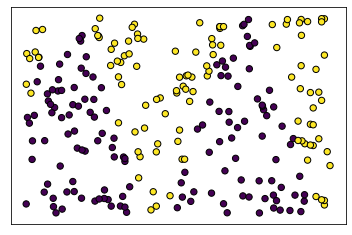

In [8]:
# Plot data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, s=40, edgecolor='k')
plt.xticks([])
plt.yticks([])
plt.show()

<P>You will use logistic regression to classify the above data. However, looking at the plot above, the data do not appear to be linearly separable. Thus, you will be generating polynomial combinations of the features in order to create new features prior to classifying the data with logistic regression.</P>
<P>First, let's split the data into training and testing data...</P>

In [9]:
# Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<P>Your task is to explore how logistic regression performs when using different polynomial combinations of the features. Here, you should experiment with polynomial combinations of degree 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10. A 1 degree polynomial combination of the features is simply the original features. A 2 degree polynomial combination of the features includes squared versions of the original features. A 3 degree polynomial combination of the features includes cubic versions of the original features. And so on. For each of 10 different polynomial degrees, you should create new features corresponding to polynomial combinations of the original features. You should use <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html"><code>sklearn.preprocessing.PolynomialFeatures</code></a> to generate the new sets of feature combinations. When generating features, you should first use the <em>training</em> data to <code>fit</code> the features and then <code>transform</code> separately both the <em>training</em> data and the <em>testing</em> data to create new features.</P>

<P>For each of the 10 polynomial degrees, you should train an <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"><code>sklearn</code> Logistic Regression classifier</a> (with <code>random_state=0</code>) on the transformed <em>training</em> data and then report the accuracy of the classifier on the transformed <em>testing</em> data. Thus, you should report 10 accuracies, one for each polynomial degree. Note: if you receive warning messages when executing your code, it may be because gradient descent is not converging to the mimumum with the default number of iterations, and you can address this by setting the maximum number of iterations to a larger value, e.g., give your logistric regression classifier the argument <code>max_iter=10000</code>.</P>

In [21]:
# Generate features corresponding to different degree polynomial combinations and print the accuracy for each degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
feature_scores = []
for d in range(1,11):
    poly = PolynomialFeatures(degree=d)
    X_train_fit = poly.fit_transform(X_train)
    X_test_fit = poly.fit_transform(X_test)
    reg = LogisticRegression()
    reg.fit(X_train_fit, y_train)
    feature_scores.append(reg.score(X_test_fit, y_test))

feature_scores


/Users/zeynoyalcin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/zeynoyalcin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

[0.84, 0.84, 0.88, 0.84, 0.64, 0.62, 0.66, 0.66, 0.66, 0.7]

<P><font color="maroon"><u>For which of the ten polynomial degrees does the logistic regression classifier achieve the highest accuracy? What is the accuracy of the classifier at this optimal degree?<u></font></P>

The 3rd degree has the highest accuracy score. With a score of 88% 

<P>It's worth noting that we are using <em>test</em> data above to evaluate different degree polynomials. If we were selecting the best degree polynomial to use as part of our classification pipeline, we would be tuning a hyperparameter (the degree of the polynomial) and we would need to instead evaluate the different degrees on <em>validation</em> data.</P>

<H2>Task 4: Evaluating Classifiers for Diagnosing Cancers as Benign or Malignant 
</H2>

<P>For the next few tasks, you will be using <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">breast cancer data</a> to diagnose whether a cancer is benign (0) or malignant (1). The features are derived from a digitized image of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image, including the radius, texture, perimeter, area, smoothness, compactness, concavity, number of concave points, symmetry, and fractal dimension, with the mean, standard error, and worst value provided for each.</P>
<P>To begin, read in the CSV file <code>breast_cancer.csv</code>, ignoring the header line, and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>.</P>

In [11]:
# Read in data and store feature vectors in array X and labels in array y






<P>Now seed the <code>numpy</code> random number generator and then split the data into 80% training data and 20% testing data (with <code>random_state=0</code>.</P>

In [12]:
# Seed the random number generator.
# Split data into 80% training and 20% testing





<P>Let's evaluate the performance of four different <code>sklearn</code> classifiers, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">decision tree</a>, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"><em>k</em> nearest neighbors classifier</a>, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">perceptron</a>, and a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">logistic regression classifier</a> (with <code>random_state=0</code> for those classifiers with randomization). Since we may end up further using the best performing of the four classifiers, it is as if we are tuning a hyperparameter (where the hyperparameter is the classification algorithm), so we will evaluate the classifiers on <em>validation</em> data rather than <em>testing</em> data.</P>

<P>One option would be to split the <em>training</em> data into separate sets, one used only as <em>training</em> data and one used only as <em>validation</em> data. Instead, we will use 5-fold cross-validation where we will split the <em>training</em> data into five equal sized sets. Then, five times, we will use four of the sets as <em>training</em> data and the remaining set as <em>validation</em> data. The <em>validation</em> accuracy that we report will be the average validation accuracy over the five trials.</P>

<P>Thus, for each of the four classifiers, you should use 5-fold cross validation, and you should report the average accuracy of the classifier over the five validation trials. You should compute the average accuracy of a classifier from 5-fold cross validation using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score"><code>sklearn cross_val_score</code></a> function. For each classifer, you should use its default parameter settings, except for the Perceptron where you should set the number of epochs to 10.</P>

In [13]:
# Compute the average 5-fold cross-validation accuracy for each of four classifiers (decision tree, kNN, perceptron, logistic regression)
















<P><font color="maroon"><u>Which classifier yielded the highest cross-validation accuracy? What is the cross-validation accuracy of the logistic regression classifier?<u></font></P>

Your answer here. 

<H2>Task 5: Regularization 
</H2>

<P>While you explored different classifiers above, let's now focus only on logistic regression classification of the breast cancer data. In particular, let's explore <em>regularized</em> logistic regression. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"><code>sklearn</code> logistic regression classifier</a> has a parameter <code>C</code> that controls regularization strength, like the regularization parameter &lambda; that we studied in class. However, the parameter <code>C</code> corresponds to the <em>inverse</em> of regularization strength so that smaller values of <code>C</code> specify stronger regularization. Below, you should experiment with seven different values for the parameter <code>C</code>: 1, 3, 10, 30, 100, 300, 1000. For each of these seven values for <code>C</code>, report the average 5-fold cross-validation accuracy of a logistic regression classifier (with <code>random_state=0</code>).</P>

In [14]:
# Using 5-fold cross validation, tune the regularization hyperparameter C for logistic regression







<P><font color="maroon"><u>Of the seven values you experimented with for the parameter <code>C</code>, which led to the highest average 5-fold cross-validation accuracy and what was its accuracy (if more than one value achieved the same maximum, report all such instances)?<u></font></P>

Your answer here. 

<H2>Task 6: Recall, Precision, and F1 Score
</H2>

<P>In Task 4 above, you determined the optimal value (among seven possibilities) for the regularization parameter <code>C</code> used by a logistic regression classifier on the breast cancer data. Using this optimal value for the parameter <code>C</code>, again train a logistic regression classifier (with <code>random_state=0</code>) on the breast cancer <em>training</em> data. In this task, rather than report the <em>accuracy</em> of the classifier on the <em>testing</em> data, you should report the <em>recall</em>, the <em>precision</em>, and the <em>F1</em> score of the classifier on the <em>testing</em> data. You may use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html"><code>sklearn.metrics.recall_score</code></a>, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html"><code>sklearn.metrics.precision_score</code></a>, and <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html"><code>sklearn.metrics.f1_score</code></a> to compute the three scores.</P>

In [15]:
# Using the optimal value for the regularization parameter C,
# report the recall, precision, and F1 score of a logistic regression classifier.














<P><font color="maroon"><u>What is the recall, precision, and F1 score of the logistic regression classifier on the <em>testing</em> data?<u></font></P>

Your answer here. 

<H2>Task 7: Feature Scaling
</H2>

<P>If you explore the breast cancer data, you will note that some features take on values in the thousands whereas other features never achieve values larger than 0.1. The features are not all on the same scale. Thus, you should perform feature scaling on the data prior to using your classifier.</P>

<P>Using <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><code>sklearn.preprocessing.StandardScaler</code></a>, you should perform feature scaling on the data. First, you should <code>fit</code> the <code>StandardScaler</code> with the <em>training</em> data. Then you can separately <code>transform</code> the <em>training</em> data and the <em>testing</em> data into "feature scaled" <em>training</em> data and "feature scaled" <em>testing</em> data, respectively. Finally, train your logistic regression classifier (with <code>random_state=0</code>) using the "feature scaled" <em>training</em> data and optimal regularization parameter <code>C</code> as determined in Task 4 above, and report the F1 score of the classifier on the "feature scaled" <em>testing</em> data.</P>

In [16]:
# After performing feature scaling (and using the optimal value for the regularization parameter C),
# report the F1 score of a logistic regression classifier.













<P><font color="maroon"><u>After applying feature scaling to the data, what is the F1 score of the logistic regression classifier on the <em>testing</em> data? Did the F1 score improve as a result of applying feature scaling to the data?<u></font></P>

Your answer here. 

<H2>Submitting your work
</H2>

<P><font color="maroon"><u>Please indicate your name and the names of any partner that worked with you on this project:</u></font></P>

Name(s): 

<P><font color="maroon"><u>Please indicate anyone else that you collaborated with in the process of doing the project:</u></font></P>

Collaborators: 

<P><font color="maroon"><u>When working on this project, approximately how many hours did you spend on each of (1) Task 1, (2) Task 2, (3) Task 3, (4) Task 4, (5) Task 5, (6) Task 6, (7) Task 7, and (8) Total?</u></font></P>

Hours on Task 1: 
Hours on Task 2: 
Hours on Task 3: 
Hours on Task 4: 
Hours on Task 5: 
Hours on Task 6: 
Hours on Task 7: 
Total hours: 

<P><font color="maroon"><u>When working on this project, did you abide by the <a href="https://www.wellesley.edu/studentlife/aboutus/honor">Honor Code</a> and is all of the work that you are submitting your own and/or your partner's?</u></font></P>

Abide by Honor Code: 

<P><font color="maroon"><u>To submit this project, please upload your <code>Project3.ipynb</code> file to the <code>Project3</code> folder that the instructor created and shared with you in your Google drive.</u></font></P>